## Final Project Submission


* Student name: Nick Oseland
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:


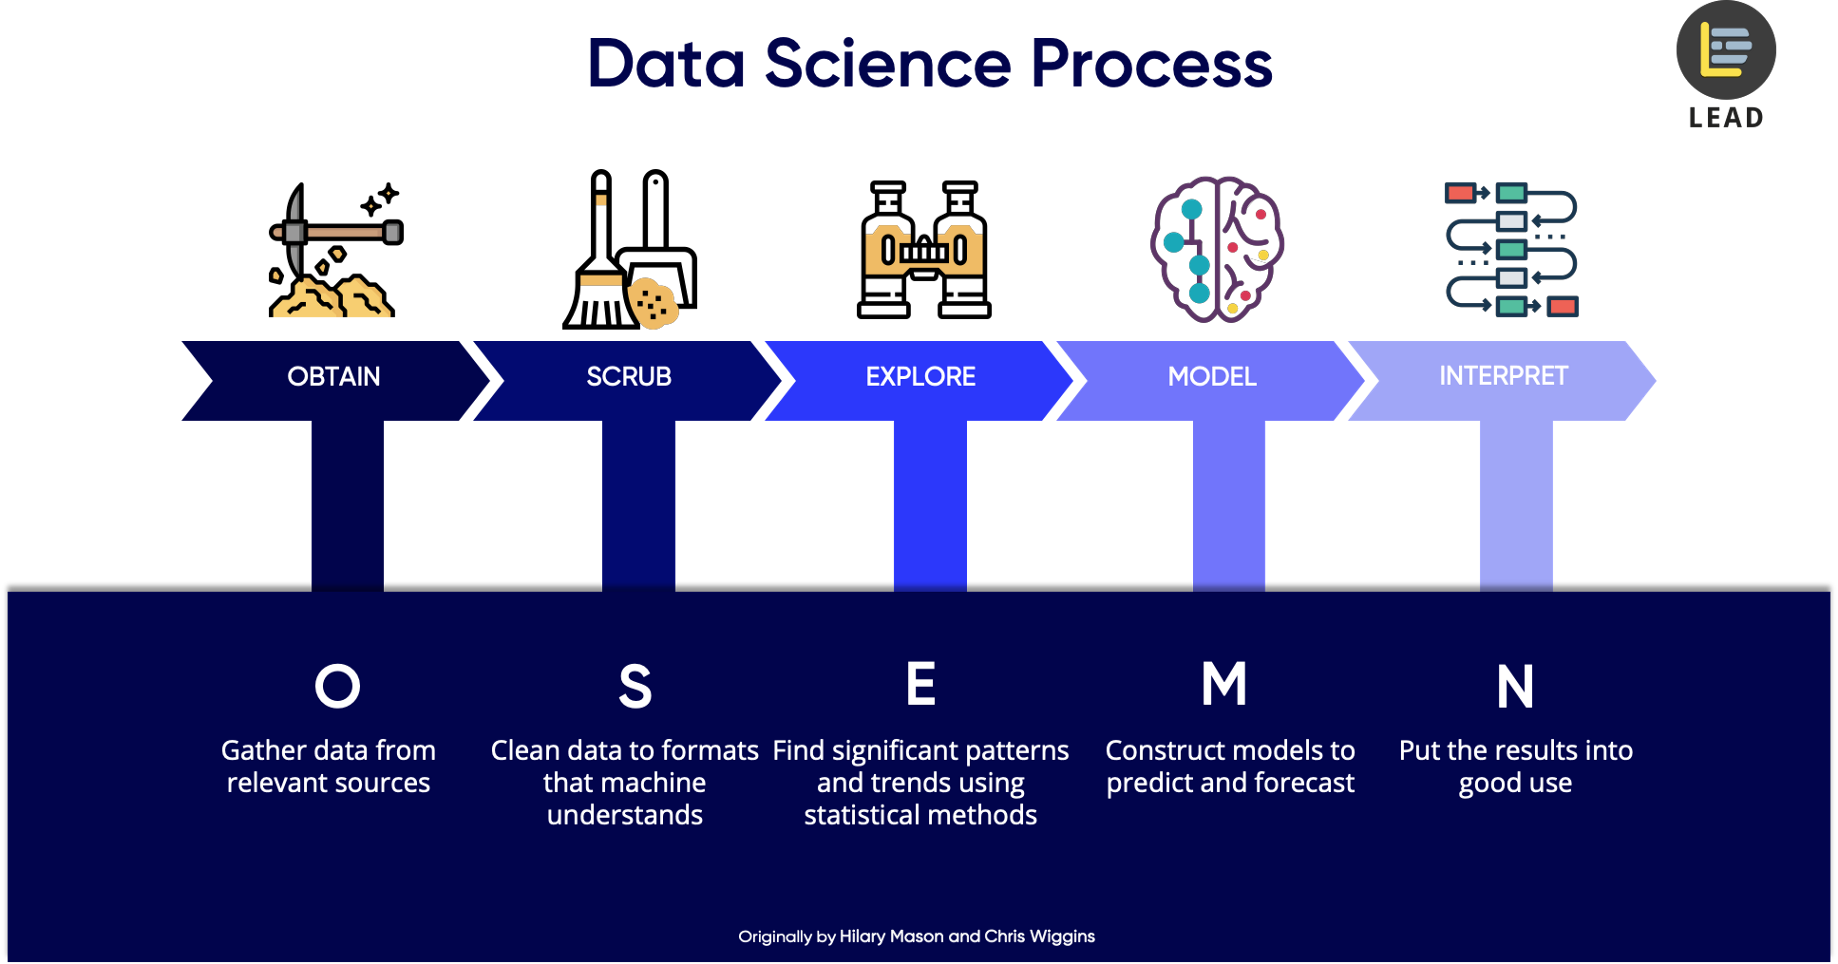

#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Objective
To build a model on the ('creditcard.csv') dataset that can help to accurately predict potentially fraudulent credit card transactions moving forward into the future.

#### Content
The datasets contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## load and start exploring the dataset.

In [2]:
df = pd.read_csv('creditcard.csv')
df.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# scales down the amount column to be more in line with the rest of the data
# I added this towards the end, it made a small improvement to my models, mostly recal, and made the most impact in my 
# random forest models.
from sklearn.preprocessing import StandardScaler
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [56]:
df['Amount'].head(10)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64

This dataset was already in really good condition. It looked to not be missing any values, but to be sure.

In [7]:
df.isnull().any().any()

False

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

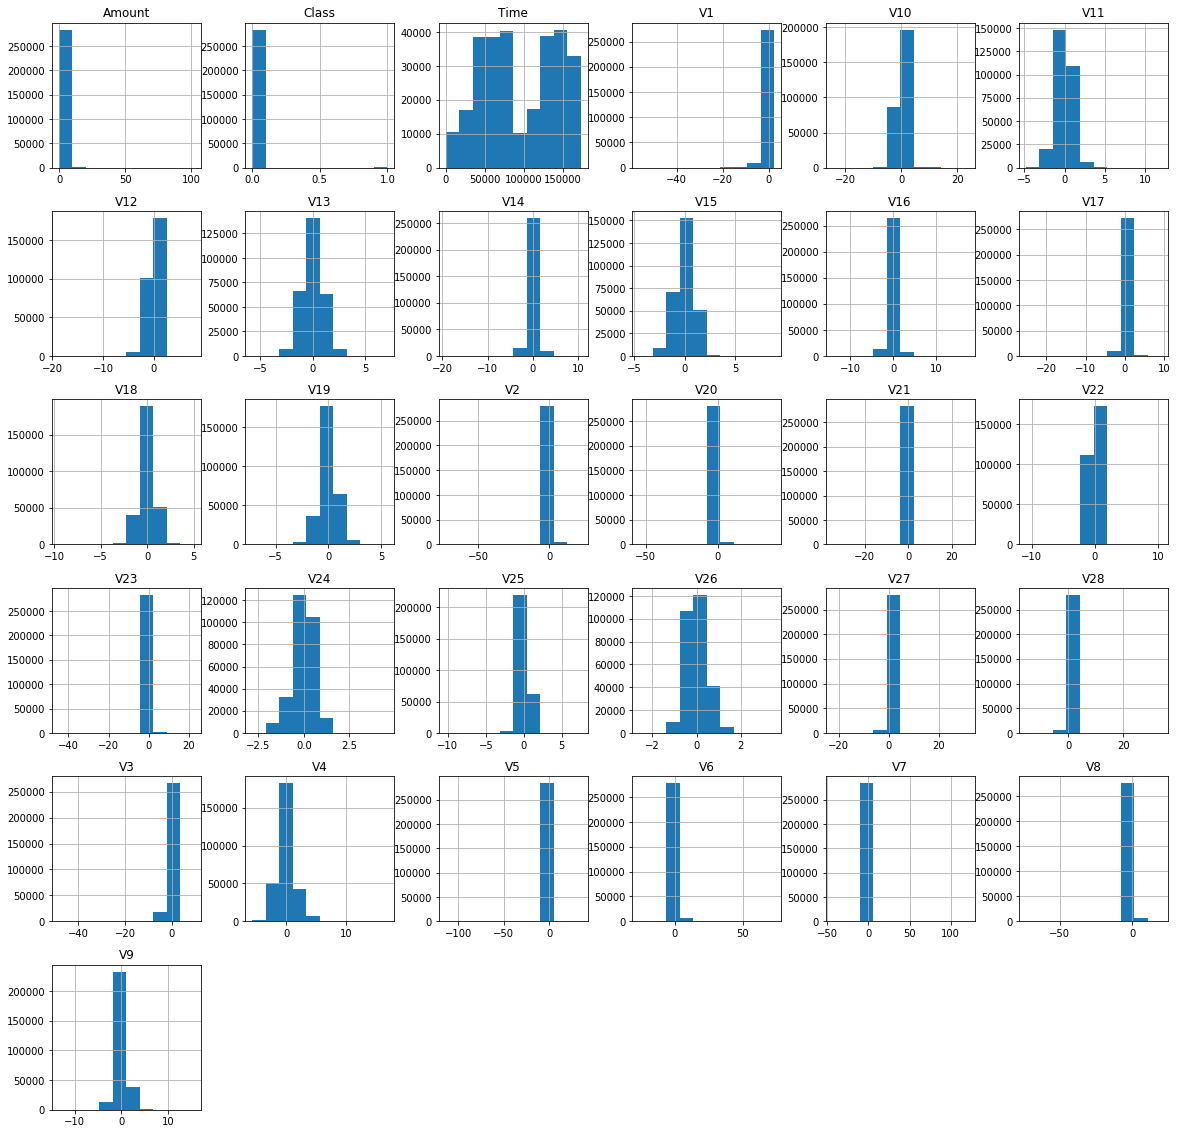

In [9]:
df.hist(figsize=(20,20))
plt.show()

It looks as though all the "V" columns are clustered pretty tightly around 0, with some small amount of variance. We knew going in that this was going to be a highly unbalanced dataset, a quick look at the histogram for Class gives us a nice visual for how severe this actually is. To make sure I am being explicit, here are a couple of print statements that also summarize this imbalance.

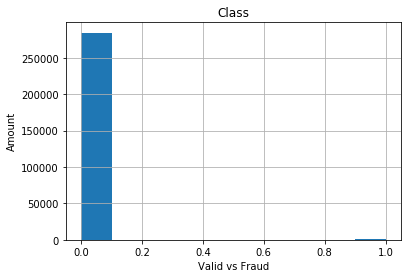

In [6]:
df['Class'].hist()
plt.title('Class')
plt.xlabel('Valid vs Fraud')
plt.ylabel('Amount')
plt.show()

In [11]:
fraud = len(df[df.Class ==1])
print(f'There are {fraud} cases of fraudulent transactions.')

There are 492 cases of fraudulent transactions.


In [12]:
not_fraud = len(df[df.Class ==0])
print(f'There are {not_fraud} cases of non-fraudulent transactions.')

There are 284315 cases of non-fraudulent transactions.


In [13]:
outlier_fraction = fraud / not_fraud
print(f'The percentage of fraudulent cases is only {outlier_fraction}%.')

The percentage of fraudulent cases is only 0.0017304750013189597%.


I want to make a quick correlation matrix as well.This will help to get a feel for what features may be strong predictors as well as if we may need to remove any features that are too strongly correlated to one another. 

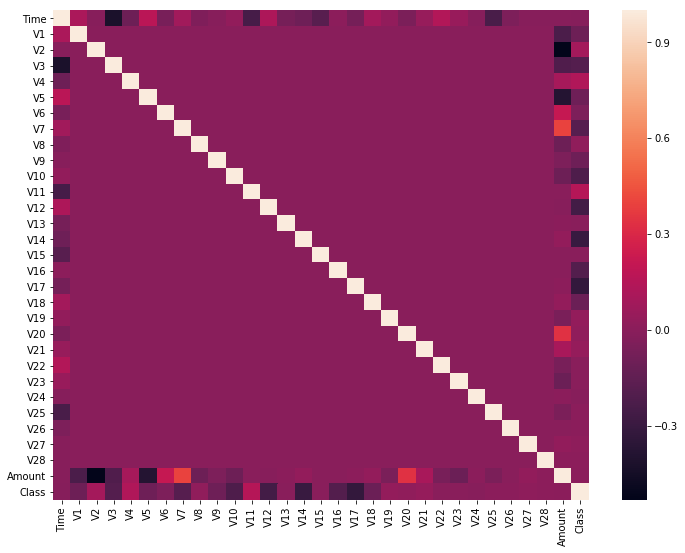

In [14]:
corrmat = df.corr()
fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat)
plt.show()

The vast majority of this heat map shows values of 0, which is to say that it does not appear that any of our "V"(V1-V28) parameters are very correlated. What I really want to focus on here is Class. lighter colors imply a positive correlation, while darker grids imply a negative one. we can see that Class has a noticeable positive correlation to V11, and a very noticeable negative correlation to V12, V14, and especially V17. There doesn't seem to be much correlation with Time, or Amount (our only other labeled data). I'm not sure how this will factor in just yet with our modeling, but it still seems like significant information to possess.

## prepare for modeling

Establish predictor variables and target, X and y.

In [15]:
X = df.drop('Class',axis=1)
X.head() # make sure it worked

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [16]:
y = df['Class']
y.head() # make sure it worked

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Decision Tree 
##### Create a training and test set

In [17]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
# importing necessary libraries
from sklearn.tree import DecisionTreeClassifier

Instantiate an instance of a single decision tree model.

In [20]:
dtree = DecisionTreeClassifier()

Fit the data to that model.

In [21]:
# takes a little time
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
predictions = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))

[[93786    52]
 [   30   119]]


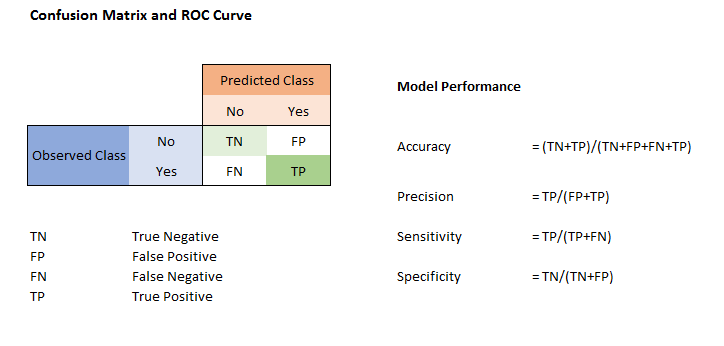

Let's break this down a little bit before moving on. In this instance (for this project), negative refers to valid transactions, while positive represents fraudulent transactions. This means that a TRUE positive is a prediction of fraud that was predicted correctly, and a FALSE positive is where the model predicted fraud, but it was actually a valid transaction. 

Precision – What percent of your predictions were correct? Precision = TP/(TP + FP)

Recall – What percent of the positive cases did you catch? Recall = TP/(TP+FN) "labeled sensitivity-above"

F1 score – What percent of positive predictions were correct? F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.70      0.80      0.74       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.85      0.90      0.87     93987
weighted avg       1.00      1.00      1.00     93987



0 = valid transaction

1 = Fraud

### Random Forest
Now let us try again with random forest classification (makes use of multiple decision trees instead of just one).

a quick explanation for those who don't already know:

A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from, and then averages the results. It is whats known as an ensemble method.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc = RandomForestClassifier() # may play with n_estimators later, for now go with default

In [51]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(confusion_matrix(y_test,rfc_pred))

[[93828    10]
 [   28   121]]


In [31]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.92      0.81      0.86       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.96      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987



Side by side comparison of performance for:

### Decision Tree

In [32]:
# Decision Tree
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[93786    52]
 [   30   119]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.70      0.80      0.74       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.85      0.90      0.87     93987
weighted avg       1.00      1.00      1.00     93987



### Random Forrest

In [33]:
# Random Forrest with n_estimators = 10 (default)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[93828    10]
 [   28   121]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.92      0.81      0.86       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.96      0.91      0.93     93987
weighted avg       1.00      1.00      1.00     93987



Again, let's break this down a bit more. Valid transactions (0) scored pretty much perfectly across all measures of the classification report, not surprising since our training dataset had 93,838 data points to train on. What we really want to focus on is the scores for our fraudulent transactions (1). As you can see, our Random Forest model scored significantly higher in precision, moderately better on the F-1 score, and slightly better for recall than our single Decision Tree. While our Decision Tree correctly identified 119 cases of fraud, it mistakenly labeled 52 valid transactions as being fraudulent. Our Random Forest model was able to accurately predict 121 cases of fraud (2 more than D.T), but only mislabeled 10, hence the much better precision score, and slightly better F-1 score. In this instance, Recall is only really concerned with how many TRUE positives it was able to predict, and our random forest got 2 more than our Decision Tree. So our Random Forest did better across the board, which is what we hoped for.

#### More Random Forests

In [41]:
# Random Forrest with n_estimators = 50 
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[93828    10]
 [   32   117]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.92      0.79      0.85       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.96      0.89      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [45]:
# Random Forrest with n_estimators = 20 
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[93828    10]
 [   35   114]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.92      0.77      0.84       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.96      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [53]:
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            #max_depth=2, max_features='auto', max_leaf_nodes=None,
            #min_impurity_decrease=0.0, min_impurity_split=None,
            #min_samples_leaf=1, min_samples_split=2,
            #min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            #oob_score=False, random_state=0, verbose=0, warm_start=False)
            
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[93824    14]
 [   63    86]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.86      0.58      0.69       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.93      0.79      0.85     93987
weighted avg       1.00      1.00      1.00     93987



In [49]:
# Random Forrest with n_estimators = 100 
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[93831     7]
 [   28   121]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.95      0.81      0.87       149

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.97      0.91      0.94     93987
weighted avg       1.00      1.00      1.00     93987



Above are a few examples of the different outputs I got when adjusting the number of estimators (n_estimators), along with other parameters I was able to adjust. While I ran more models than just these, the results never differed all that greatly in terms of improvement, they could get a lot worse though, but the default arguments tended to perform the strongest. directly above is the best results I was able to create (n_estimators = 100) while it had the best scores overall, I was not able to increase the recall score past 81%. However, I was able to drastically increase the computational time needed for each model as I increased the figure for n_estimators, I took it as high as 200, which took forever, and did slightly worse than other models.

### Conclusions/Recomendations

Let's break this down one last time . Valid transactions (0) scored pretty much perfectly across all measures of the classification report, not surprising since our training dataset had 93,838 data points to train on. What we really want to focus on is the scores for our fraudulent transactions (1). As you can see, our Random Forest model scored significantly higher in precision, moderately better on the F-1 score, and slightly better for recall than our single Decision Tree. While our Decision Tree correctly identified 119 cases of fraud, it mistakenly labeled 52 valid transactions as being fraudulent. Our Random Forest model, in the end was able to accurately predict 121 cases of fraud (2 more than D.T), but only mislabeled 7, giving us a precision score of 95%, and slightly better F-1 score as well. In this instance, Recall is only really concerned with how many TRUE positives it was able to predict, and our random forest got 2 more than our Decision Tree. So our Random Forest did better across the board, which is what we hoped for.

In the end, I was able to create a model that can accurately predict fraudulent credit card transactions with 95% accuracy. While I am fairly pleased with these results, I believe there is still room for improvement. I only ended up using two different models to tune on this dataset, but there are still more options available. While some of them I had to pass over because of computational costs, like KNN (this is a big dataset), I would still be interested in trying SVM (Support Vector Machines) in the future when I have more time. For now, I feel that the models I chose to work with were the best choice for the type of classification I was doing, especially on such a large, lopsided dataset, as they (especially Random Forest) tend to be more forgiving of this. I would recommend continuing to gather data, so that we are able to keep improving the accuracy of our models. I would also recommend trying to focus more on raising the recall score (specifically), even if it hurts some of the other scores. While I really focused on getting the best performing model overall, I would imagine that the most costly mistake that could be made was to miss fraudulent charges initially and be responsible for paying that money back to the customer. However, tweaking the model too much, so that it starts labeling a lot of valid transactions as fraudulent could also be a problem if you start harassing your customers too much about whether or not the charges made where valid.   

#### Future work

- continue gathering data, especially on fraudulent activity.

- Try other modeling techniques if able.

- Decide what the balance between recall and precision should be, then adjust the modeling techniques accordingly. 